## AV biased network

In previous examples, HD cell input to the conjunctive cells was stonger than the angular velocity input, meaning conjunctive cells could only fire when HD cells fired, limiting the resolution to the HD firing rate

If intead these cells were 'primed' by the HD input but fired when recieve the go signal, the conjunctive cells may fire at a finer resolution


- All this solution seems to achieve is increased firing rate in HD cells during higher angular velocity but not increased movement...
- this may still be helpful if increase the firing rate of the conjuctive cells
    - may need to play with the conjunctive cell delay!
    
angular velocity input weight > HD input weight

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import nest as sim
import numpy as np
from stdHDattractor import stdHDattractor
from stdHDattractor import plotNetworkOutput
sim.ResetKernel()
sim_len = 10000
n = 50

## Define parameters

In [9]:
model_params= {
    'sim_len': sim_len,
    'n' : n,
    'cd_w' : .8,
    'go_w' : 1.8,               # angular velocity input weight
    'cj_w' : 30}              # conj > HD move bump weight

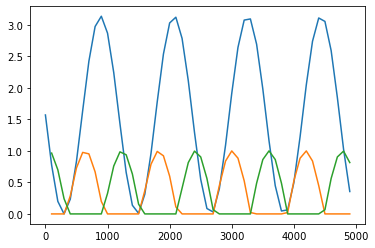

In [10]:
time = np.arange(0, 5000, 100)
theta = (np.sin(time)*(np.pi/2))+(np.pi/2)

plt.plot(time,theta)

# calc angular velocity
w = np.diff(theta)/np.diff(time)
w = w/max(w) # normalise

GO_R = np.zeros(len(w))
GO_L = np.zeros(len(w))
for i,v in enumerate(w):
    if v>0:
        GO_R[i] = v
    else:
        GO_L[i] = abs(v)
plt.plot(time[1:], GO_R)
plt.plot(time[1:], GO_L)

In [11]:
gl_tms=[]
gr_tms=[]

for i,v in enumerate(GO_L[:-1]):
    num_spks = int(v*20)
    for j in range(num_spks):
        gl_tms.append(time[i]+((j+1.0)*5))
# print(gl_tms)        
for i,v in enumerate(GO_R[:-1]):
    num_spks = int(v*20)
    for j in range(num_spks):
        gr_tms.append(time[i]+((j+1.0)*5))
# print(gr_tms)     


model_params['gl_tms']=gl_tms
model_params['gr_tms']=gr_tms

### Create standard ring attractor network

In [12]:
V_data, spk_data = stdHDattractor(model_params,{})

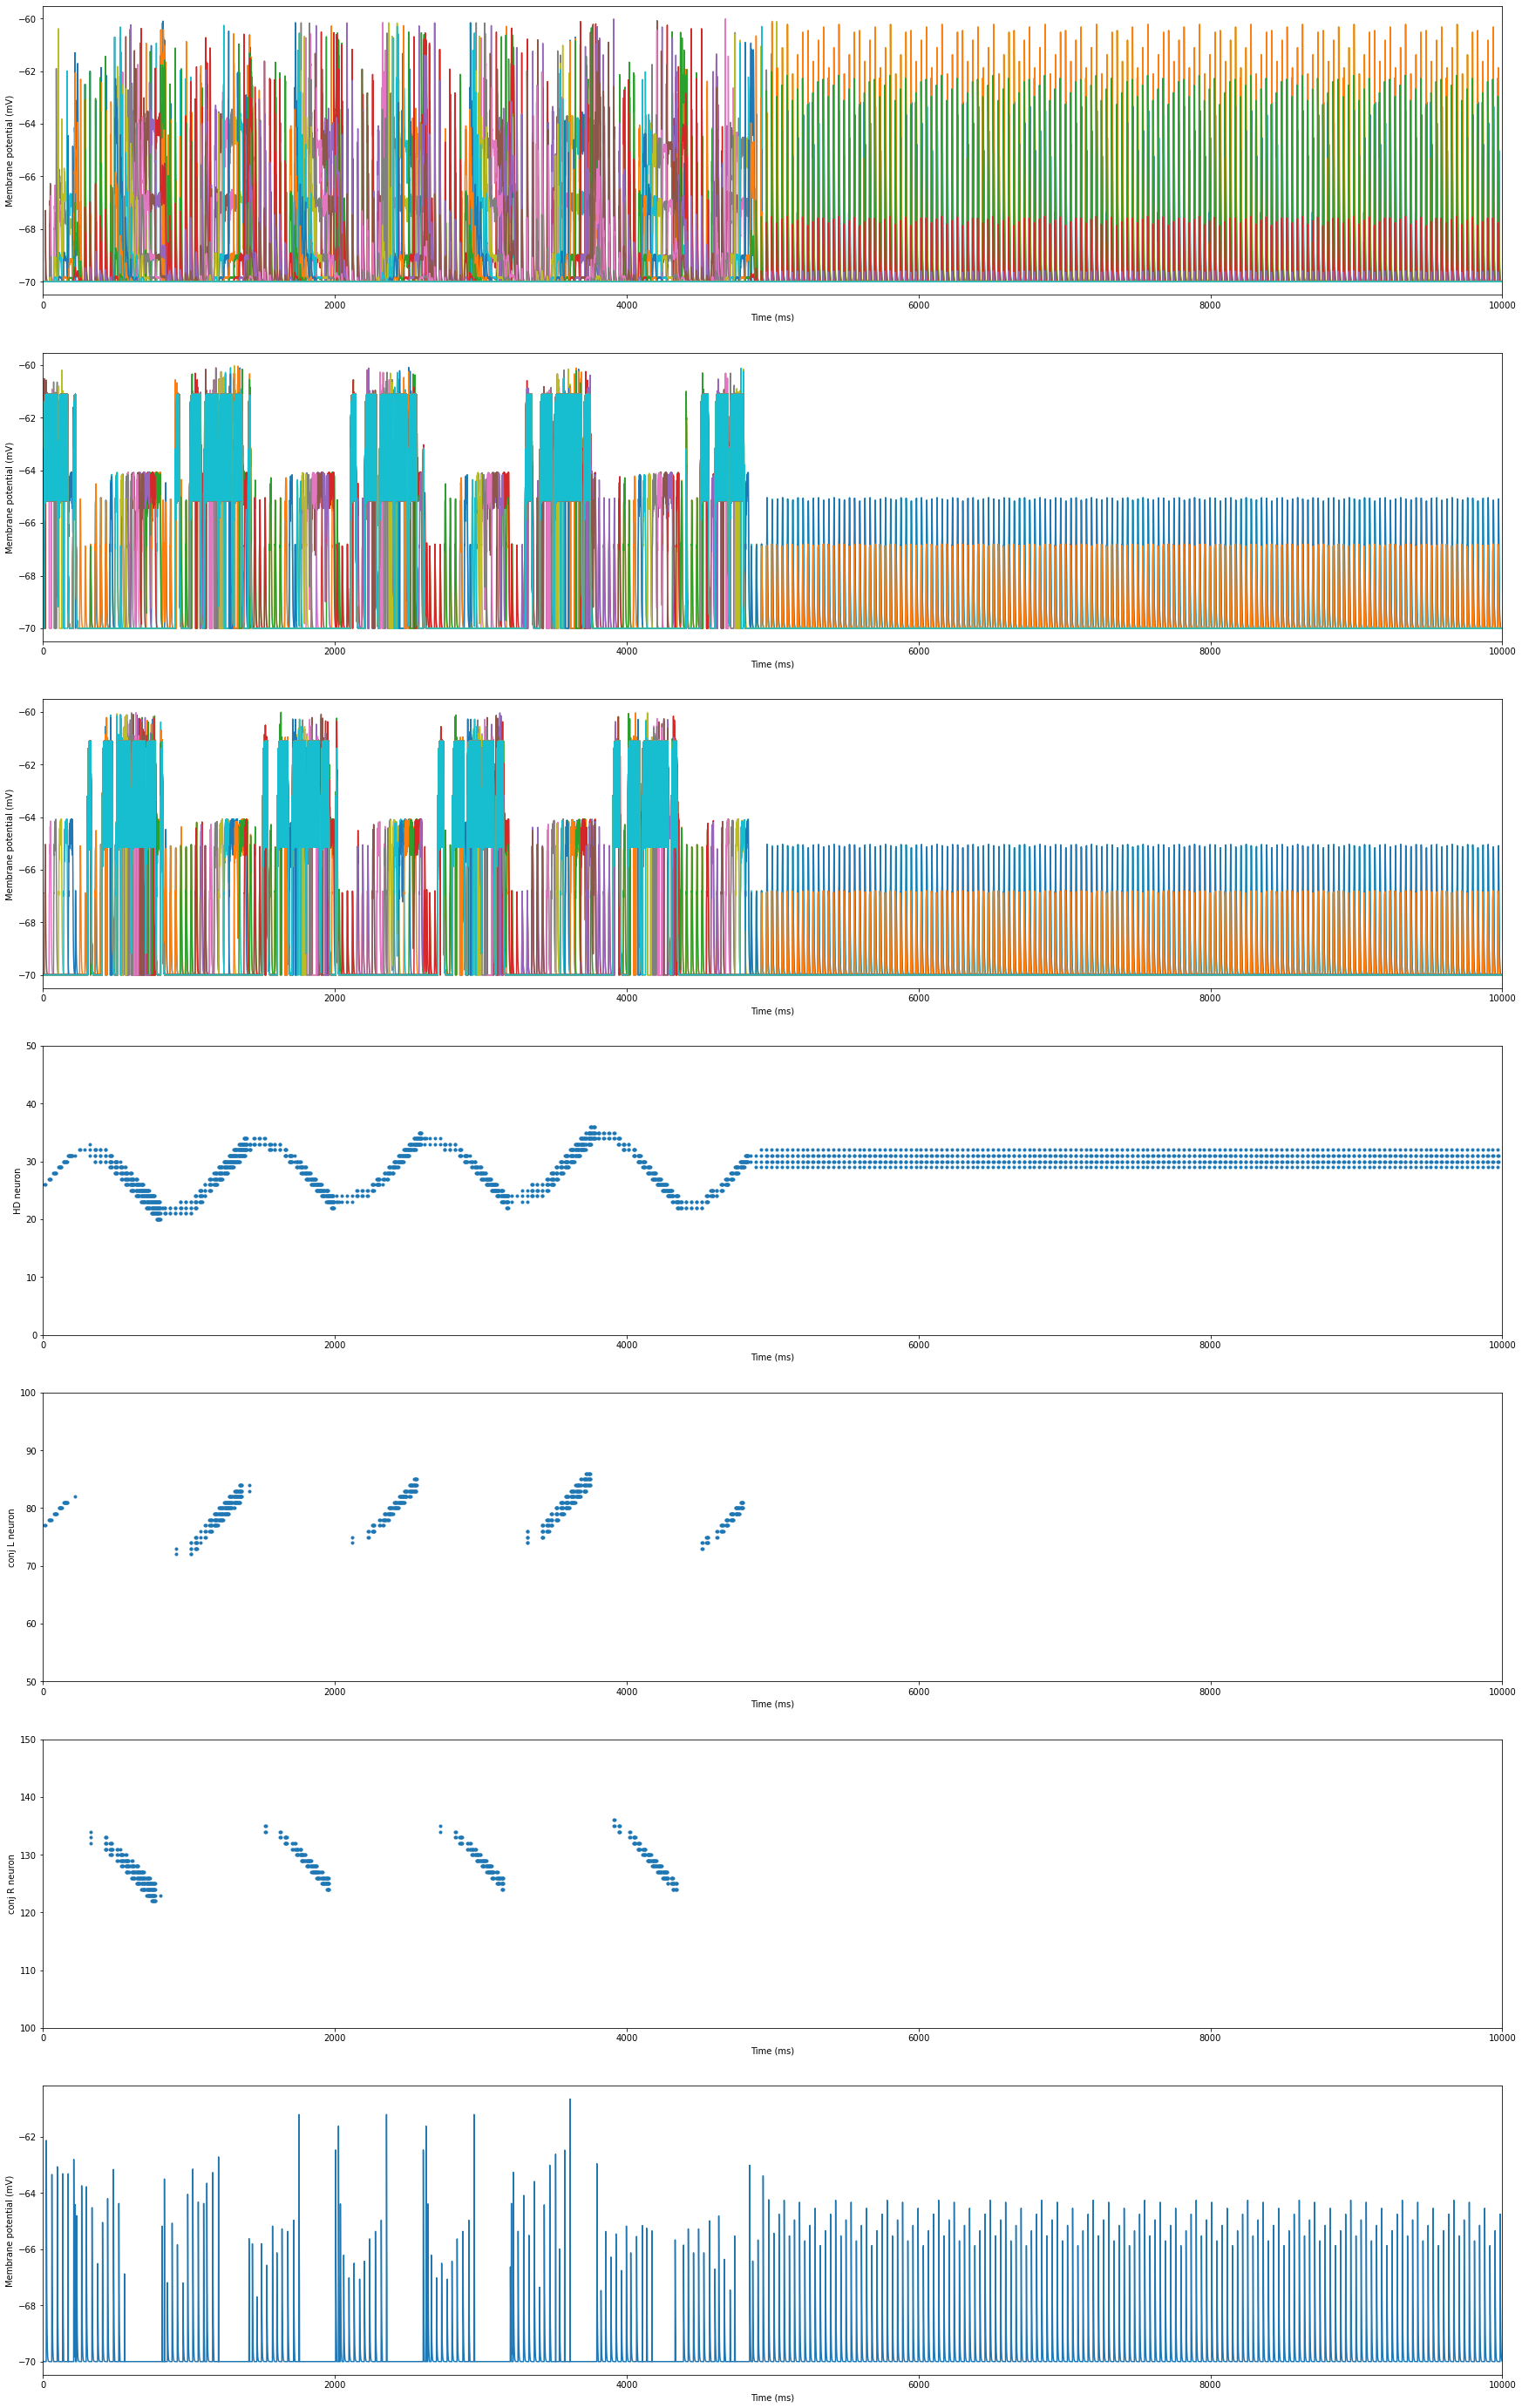

In [13]:
plotNetworkOutput(V_data, spk_data,sim_len,n)

MovieWriter ffmpeg unavailable; using Pillow instead.


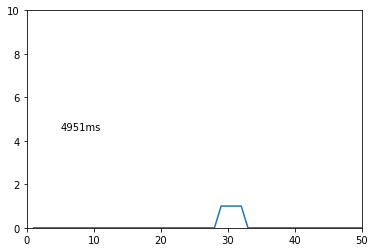

In [14]:
fr = 50 #ms
t = np.around(spk_data['HD_t'],-1)
s = spk_data['HD_s']

u = sorted(set(t))
# for time in u:
#     idx = np.where(t == time)
#     cells = s[idx]
# #     for cell in cells:
#     print(cells)  
    
#     times = np.ones(len(cells))*time
#     print(times)

fig = plt.figure()
ax = plt.axes(xlim=(0, n), ylim=(0, 10))
ax.xaxis.set_label('Cell #')
ax.yaxis.set_label('# spikes')
theText = ax.text(5,4.5,'0ms')
ln, = plt.plot([], [])

def animate(tms):
    all_count = np.zeros(n)
    all_cells = list(range(1,n+1))
    idx1 = np.where(t > tms-fr)
    idx2 = np.where(t < tms)
    idx = np.intersect1d(idx1,idx2)
    if len(idx)>0:
        cells = s[idx]
        c = sorted(list(set(cells)))
        count=[]
        for cell in c:
            pos = np.where(cells == cell)
            count.append(np.size(pos))
            all_count[cell-1]=np.size(pos)
        ln.set_data(all_cells,all_count)
        theText.set_text(f'{tms}ms')
    return ln

ani = FuncAnimation(fig, animate, frames=range(1,5000,fr),repeat=False)
ani.save(f'bump_example_{fr}ms-7.gif')
# plt.show()

![](bump_example_50ms-7.gif "gif")
![](odometry.gif "gif")